# Vectorized epsilon-greedy bandits

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn

In [11]:
number_arms = 100
number_pulls = 50000
number_bandits = 2000  # number of randomly generated bandit configurations

epsilon = 0.1

In [12]:
%%time
q_star = np.random.normal(5, 1, (number_bandits, number_arms))  # Q* with mean 5 and var 1
q = np.zeros((number_bandits, number_arms))
counts = np.zeros((number_bandits, number_arms))
rand = np.random.rand(number_pulls, number_bandits)  # random values for epsilon-greedy
range_bandits = np.arange(number_bandits)  # TODO: this is a hack to get slicing working, is there a better way?
rewards_global = np.zeros((number_bandits, number_pulls))

for p in range(number_pulls):
    # select an arm
    r = rand[p]
    arms = np.where(r < epsilon, np.random.choice(number_arms), np.argmax(q, axis=1))
    
    # Get a reward based on arm
    rewards = np.random.normal(q_star[range_bandits, arms], 1)
    rewards_global[:, p] = rewards
    
    # Update
    tmp = np.zeros_like(counts)
    tmp[range_bandits, arms] = 1  # TODO: don't like these tmp stuff, can we get rid of them?
    counts += tmp
    tmp = np.zeros_like(q)
    tmp[range_bandits, arms] = (1 / counts[range_bandits, arms]) * (rewards - q[range_bandits, arms])
    q += tmp

CPU times: user 59.5 s, sys: 891 ms, total: 1min
Wall time: 1min


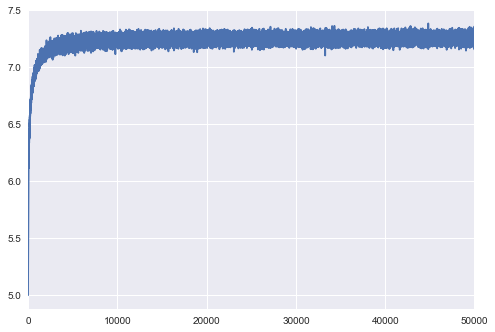

In [13]:
pd.Series(rewards_global.mean(axis=0)).plot();

### References
- http://incompleteideas.net/sutton/book/ebook/node19.html